## Calculating the Expected Return of a Stock (CAPM)

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Obtain data for Microsoft and S&P 500 for the period 1st of January 2012 – 31st of December 2016 from Yahoo Finance. 
Let S&P 500 act as the market. 
Calculate the beta of Microsoft.


In [5]:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
from pandas_datareader import data as wb

tickers = ['ORCL', '^GSPC']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2015-3-25', end='2015-6-25')['Adj Close']  
    
sec_returns = np.log( data / data.shift(1) )
cov = sec_returns.cov() * 250
cov_with_market = cov.iloc[0,1]
market_var = sec_returns['^GSPC'].var() * 250

ORCL_beta = cov_with_market / market_var

Assume a risk-free rate of 2.5% and a risk premium of 5%. <br />
Estimate the expected return of Microsoft.

**Calculate the expected return of P&G (CAPM):**
### $$
\overline{r_{pg}} = r_f + \beta_{pg}(\overline{r_{m}} - r_f) 
$$

In [49]:
ORCL_er = 0.025 + ORCL_beta * 0.05
ORCL_er

0.080588766370463652

In [50]:
%matplotlib inline
import numpy as np
from pylab import *
import pandas as pd
import pandas_datareader.data as web
import datetime
import sys
import numpy as np
import scipy as sp
import pylab
from scipy.optimize import leastsq

In [54]:
import pandas as pd
import pandas_datareader.data as web
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2015,4,1)
end = datetime.datetime(2015,6,1)
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
orcl = web.DataReader("ORCL", "yahoo", start, end)
spy = web.DataReader("SPY", "yahoo", start, end)

In [55]:
from sklearn.linear_model import LinearRegression
# we're using yahoo finance data, pandas datareader will import the data we need

from pandas_datareader.data import DataReader

In [58]:
symbols = ["ORCL", "SPY"]
# df is the main dataframe that'll hold the Adjusted closing prices
df = pd.DataFrame()

In [60]:
for symbol in symbols:
    dftemp = DataReader(symbol,"yahoo",start)
    
    # we only need the adjusted close price.
    df[symbol] = dftemp["Adj Close"]


In [62]:
npMatrix = np.matrix(df)
X, Y = npMatrix[:,0], npMatrix[:,1]
mdl = LinearRegression().fit(X,Y) # either this or the next line
#mdl = LinearRegression().fit(filtered_data[['x']],filtered_data.y)
m = mdl.coef_[0]
b = mdl.intercept_


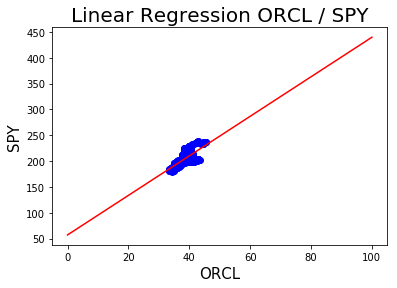

In [64]:
plt.scatter(X,Y, color='blue')
plt.plot([0,100],[b,m*100+b],'r')
plt.title('Linear Regression ORCL / SPY', fontsize = 20)
plt.xlabel('ORCL', fontsize = 15)
plt.ylabel('SPY', fontsize = 15)
plt.show()

In [65]:
import statsmodels.api as sm
res = sm.OLS(Y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.983e+05
Date:                Sat, 22 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:04:39   Log-Likelihood:                -1961.7
No. Observations:                 519   AIC:                             3925.
Df Residuals:                     518   BIC:                             3930.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.2739      0.012    445.285      0.0